# Imports

In [1]:
import numpy as np
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import sklearn

# Data Preprocessing

train.csv is the file on which we perform all the training process.

test.csv is the final set on which we run our model and submit the output of, to Kaggle

So our actual dataset for the whole work will be train.csv

In [2]:
titanic = pd.read_csv('./titanic-dataset/train.csv')
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Direct findings

- 7 numerical data -> `PassengerId`, `Survived`, `Pclass`, `Age`, `SibSp`, `Parch`, `Fare`
- 6 categorical data -> `Name`, `Sex`, `Ticket`, `Cabin`, `Embarked`

- `Name` is useless for EDA.
- `Cabin`, `Age`, `Embarked` features have null data.

- `Fare` has wider standard deviation -> chance of anomaly

- `Age` has a narrow standard deviation -> not much to worry about. Age can varry.

## Exploring columns & Data Cleaning

### Act on null value columns
columns with null and nan values need to be looked at.

null values offer no assistance in model building so we need to take steps to handle these columns.

1. If less null values:
    - remove the rows, or
    - fill with avergae values
2. if more null values:
    - remove the column as it won't be much help.

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Let us remove `Cabin` from the dataset

In [7]:
titanic = titanic.drop('Cabin', axis=1)

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

- Let us remove rows which have null values of `Embarked`
- let us fill null values in `Age` with average value of the column

In [9]:
# Dropping rows with null Embarked
titanic = titanic[titanic['Embarked'].notna()]

In [10]:
# filling null age with average age
titanic.Age.fillna(value=titanic.Age.mean(), inplace=True)

In [11]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


- Remove Name from dataset

In [13]:
titanic.drop('Name', axis=1, inplace=True)

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 76.4+ KB


Now we have a clean dataset to proceed with.

### Plotting Columns

#### Checking outliers

<AxesSubplot:>

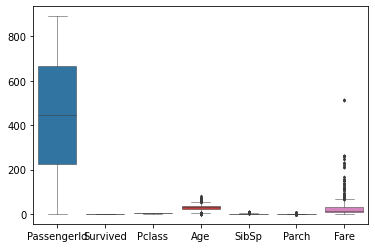

In [63]:
sns.boxplot(data=titanic,fliersize=2, linewidth=0.5)

We can see that only meaningful plots we need are for:
- Fare
- Age

Other columns need not be observed for outliers:
- PassengerId: no meaning of outlier here
- Survived: 0,1 data
- Pclass: 1,2,3 data
- SibSp: Number of sibling/spouce; not much of value range for having outliers
- Parch: Number of parents; not much of value range for outliers

In [65]:
_df = titanic[['Fare', 'Age']]

<AxesSubplot:>

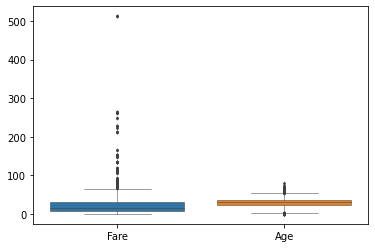

In [66]:
sns.boxplot(data=_df, fliersize=2, linewidth=0.5, showfliers=True)

Looks like a lot of anomalous points are present in Fare attribute & a few in Age attribute

<AxesSubplot:>

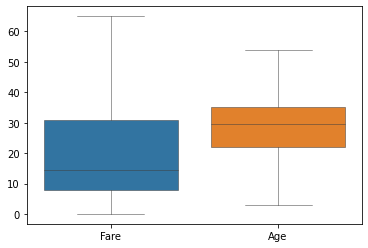

In [67]:
# without outlier points
sns.boxplot(data=_df, fliersize=2, linewidth=0.5, showfliers=False)

This has quite a range of outliers.

Let's remove the outliers for sure now.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

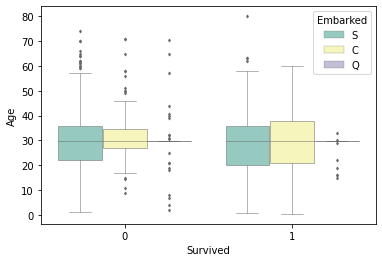

In [44]:
# checking plot with categorical data
sns.boxplot(data=titanic.drop('PassengerId', axis=1), hue="Embarked", palette="Set3", x='Survived', y='Age', linewidth=0.5, fliersize=2)

# EDA

How many survived

In [67]:
titanic.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

only 340 survived.

Now let's check survivors based on social economic status (_pclass_)

### Relation between `pclass`_(sicio-economic status)_ & `survival`

/Users/prakhar.yadav/opt/anaconda3/envs/EV1/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


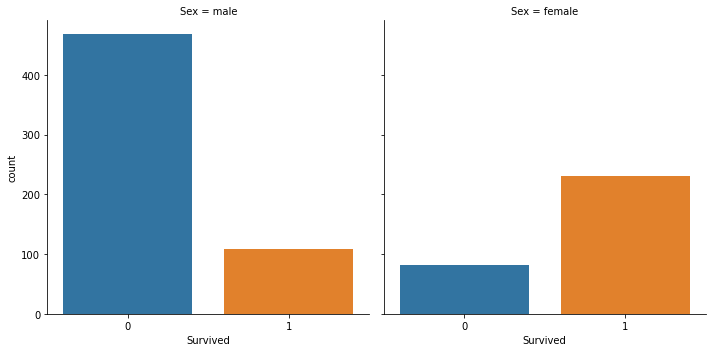

In [79]:
sns.factorplot(x='Survived',col='Sex',kind='count',data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

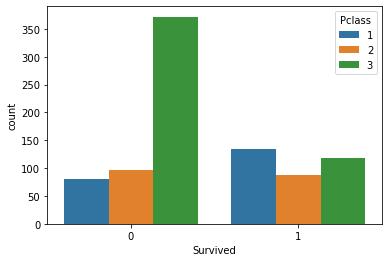

In [80]:
sns.countplot(x='Survived',hue='Pclass',data=titanic)

In [70]:
titanic.groupby(by=['Survived', 'Pclass']).count()['PassengerId']

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         134
          2          87
          3         119
Name: PassengerId, dtype: int64

- more people from Class 1 survived
- class 2 is inconclusive
- less people from Class 3 survived

Hence, higher socio economic status seems to have more survivors.

### Relation between `pclass` (_social status_), `survival` & `gender`

In [74]:
titanic.groupby(by=['Survived', 'Sex', 'Pclass']).count()['PassengerId']

Survived  Sex     Pclass
0         female  1           3
                  2           6
                  3          72
          male    1          77
                  2          91
                  3         300
1         female  1          89
                  2          70
                  3          72
          male    1          45
                  2          17
                  3          47
Name: PassengerId, dtype: int64

More Female survivors than male.

#### Correlation heatmap

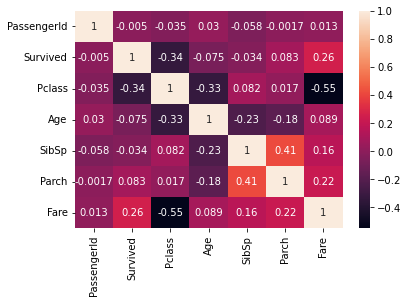

In [78]:
ax = sns.heatmap(titanic.corr(), annot=True)

Few deductions:
- Fare seems moderately correlated with Survivors. So people who paid higher fare (possibly for better deck options), are the ones who had better survival chances.
- Pclass, Fare, Survived :
    - higher Pclass means cheaper accommodation and hence lower survivors.

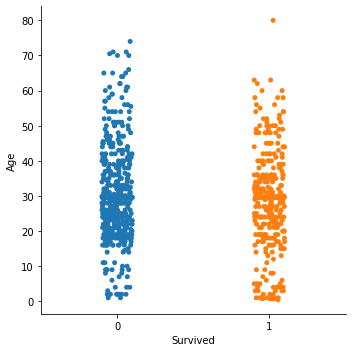

In [90]:
sns.catplot(y="Age", x="Survived", data=titanic)

# Dealing with categorical data:
- One Hot Encoding
- Target Encoding
- Label Encoding

Label encoding should almost always be avoided, because it assigns a number to each category.</br>
Issue is that numbers hold value and can introduce relations that don't really exist.

We will be trying One Hot Encoding here.

### Performing One Hot Encoding

# TODO: Analysis
- [x] is there a relation between `gender` & `survival`

- [x] is there a relation between `pclass` (_social status_) & `survival`

- [x] is there a relation in `Fare` & `survival`

- [x] relation between `Age` & `Survival`

- [x] what insight we get from `Embarked`


Perform:
- [x] plotting
- [x] correlation
- [ ] pca